
# 範例 : Attention 的變化型
***
- 本範例目標是藉由實做不同的 attention 機制

# [教學目標]
- 了解 attention 有許多不同的實作方法 
- 了解 如何運用矩陣乘法調整 attention



# [範例重點]

- 可以看成向量先用一層機器自學參數的線性調整之後再求內積相似度．
- 其中 W 是機器自學參數．

- 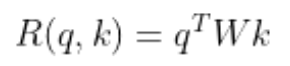

- 完成的函數可以直接套用在上次的程式中
-- 請注意輸入 hidden dimension

In [2]:
import torch
import torch.nn as nn
import torch.optim as optim
import torch.nn.functional as F

In [5]:
class Attention(nn.Module):
  def __init__(self, enc_hid_dim, dec_hid_dim):
    super().__init__()
    self.w = nn.Linear((enc_hid_dim * 2) , dec_hid_dim , bias = False)

  def forward(self, hidden, encoder_outputs, mask):
    # hidden bz , dec_hid_dim
    # encoder_outputs src len, bz , enc_hid_dim x 2
    # mask bz , src len
    
    batch_size = encoder_outputs.shape[1]
    src_len = encoder_outputs.shape[0]

    encoder_outputs = self.w(encoder_outputs)
    # encoder_outputs src lrn , bz , dec_hid_dim --> converted size

    hidden = hidden.unsqueeze(1) 
    # hidden unsqueeze bz , 1 , dec_hid_dim

    attention = torch.matmul( hidden , encoder_outputs.permute(1, 2, 0)   )
    # attention bz, 1 , src len
  
    attention = attention.squeeze(1)
    # squeeze bz , src len

    attention = attention.masked_fill(mask == 0, -1e10)

    return F.softmax(attention, dim = 1)
